[back](./03A-cluster-analysis.ipynb)

---
## `Classification and Regression`

- **Classification** and **Regression** are considered as supervised learning in Machine Learning
- Meaning, we have the known output, the output is labeled and therefore it is called supervised learning
- There are two types of supervised learning
  - Classification
  - Regression


### `Initial Setup`

Imports of various classifiers and regressors from different libraries

In [1]:
# Linear Regression is for regression
# Logistic Regression is for classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# SVM is Support Vector Machine
# SVC is Support Vector Classifier
# SVR is Support Vector Regressor
from sklearn.svm import SVC, SVR

# SKLearn Neighbors is another big library, that provides the KNeighborsClassifier and KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

Other imports and dataset creation

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'../../assets/single_family_home_values.csv')
df.head(4)


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073


In [3]:
# X will be all the columns, without estimated_value
X = df.drop('estimated_value', axis=1)
X = X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'priorSaleAmount']]
X.fillna(0, inplace=True)
X.head()


,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0


We have our features defined as `X`, to predict something.

So, we can now define `y`. In the previous section we didn't want to have `y` because it was unsupervised learning, meaning there is no `y`, meaning **no non-outcome**.

However, in `classification` and `regression` there are **non-outcomes**, therefore we want to consider `X` and `y`

**NOTE::** `X` is always uppercase, meaning it is a `matrix` and `y` is lowercase, meaning it is a `vector`

In [4]:
y = df.estimated_value
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

### `Classification versus Regression`

> **Classification**


- As the name suggests, it to classify something, meaning, the output variable is a categorical variable
- e.g., it is going to be [red | blue], [one | two]
- or, it can be more than two class, meaning, it can be [red | blue | yellow | orange]
- This is considered as classification, so the target variable is categorical variable.


> **Regression**

- It is considered as predicting a numerical variable.
- What is being tried to predict is going to be a numerical value.

---

### `Linear and Logistic Regression`

#### `LineraRegression`

In [5]:
lg = LinearRegression()
lg.fit(X=X, y=y) # Training the model
lg.score(X=X, y=y) # To evaluate the model

0.7648477834199695

There is a concept in `DataScience` called **over-fitting** and **under-fitting**
- over-fitting meaning that it's going after the noise.
- meaning, if the model sees a new data-set, it would not perform that well because it would be very very specific to this data set that we used to train

So, in `sklearn`, luckily, we have a package called `model_selection` _(previously known as **cross_validation**)_ from which we can import and use `train_test_split` to partition our data-set for training and testing of 80% and 20% by default respectively.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# By default, 80% will go to training data-set and 20% will go to test data-set
# And it returns values in the order of X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
X_train.shape, y_train.shape

((11250, 7), (11250,))

Now, we can make use of this data-set which is split specifically for training to train our model

In [9]:
lg = LinearRegression()
lg.fit(X=X_train, y=y_train) # Training the model
lg.score(X=X_test, y=y_test) # To evaluate the model / score / R-square


0.7580178906271744

Now for Logistic Regression, our target variable should be **categorical variable**.

So, we cannot use `y` variable as is.

But, what we can do is, create a `y2` variable that's going to be using the **estimated_value**, but it's going to be categorical.

And we obtain that as follows

In [10]:
df['estimated_value_bins'] = df.estimated_value.apply(lambda x: 'high' if x > 700000 else 'low')
df.estimated_value_bins.value_counts()


low     11500
high     3500
Name: estimated_value_bins, dtype: int64

Now, we see that the estimates of `low` and `high` are not that balanced, so we'll try to recalculate it

In [11]:
df['estimated_value_bins'] = df.estimated_value.apply(lambda x: 'high' if x > 400000 else 'low')
df.estimated_value_bins.value_counts()


high    11197
low      3803
Name: estimated_value_bins, dtype: int64

Not much of a change, so instead of guessing the value, we can try generating a histogram and easily pick the right value

<AxesSubplot:>

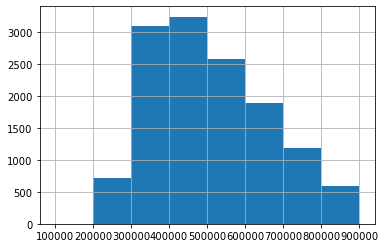

In [12]:
df.estimated_value.hist(bins=[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000])

In [13]:
df['estimated_value_bins'] = df.estimated_value.apply(lambda x: 'high' if x > 500000 else 'low')
df.estimated_value_bins.value_counts()


high    7963
low     7037
Name: estimated_value_bins, dtype: int64

Now we can see that the `estimated_value_bins` is clearly a categorical value

In [14]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,estimated_value_bins
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,low
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963,low
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840,low
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,low
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,high
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,low
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,high
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,low
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,low
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,low


In [15]:
y2 = df.estimated_value_bins

Generating the `train_test_split` data based on the new categorical value `y2`

In [16]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2)


#### `LogisticRegression`

In [17]:
log = LogisticRegression()
log.fit(X_train, y2_train)

LogisticRegression()

In [18]:
log.score(X_test, y2_test)

0.8221333333333334

Another function that is pretty useful is `.predict()`

In [19]:
y_pred = log.predict(X_test)
y_pred

array(['low', 'high', 'high', ..., 'low', 'high', 'low'], dtype=object)

In [20]:
np.array(y2_test)

array(['low', 'high', 'high', ..., 'low', 'high', 'low'], dtype=object)

When we see the `prediction` and the actual `y2`, almost all of the values displayed are matching.

A better way of testing this, again pretty much using another functionality from `sklearn` library, i.e., `confusion_matrix`

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:

confusion_matrix(y_true=y2_test, y_pred=y_pred)

array([[1633,  386],
       [ 281, 1450]])

Now, to understand this result, just remember that the diagonal (0x0 and 1x1) is the right classification / y_prediction

Where as

`0x1` is the **type1 error** -> predicted high, but it was low

`1x0` is the **type2 error** -> predicted low, but it was high

### `Support Vector Machine`

As in the image below, this is a sample plot from a `SVM`.

Here, we have two features `X` and `Y` which are the red dots and the blue dots.

SVM classifier (SVC), will classify the data points had created a buffer in between that has pushed away the two class from each
other as much as possible, this is what SVM is doing under the hood.

As any other model, there is classifier and a regressor. The difference is in the target variable.

In SVC, the target variable is a categorical variable and what you are trying to predict is a categorical variable, then we can use a classifier (SVC). Else, we need to use a regressor, which will predict a numerical value.


In [23]:
from IPython.display import Image
Image(url='../../assets/svm.png')


#### `Support Vector Regressor`

In [24]:
svr = SVR()

In [25]:
svr.fit(X_train, y_train)

SVR()

In [26]:
svr.score(X_test, y_test)

-0.05067683153191793

Based on the score, we see that it is bad

Let's try and see SVC

#### `Support Vector Classifier`

In [27]:
svc = SVC()

In [28]:
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7045333333333333

We can see that this is still worse that **LogisticRegression**

Let's create the confusion_matrix and see the result, to see the type1 & type2 errors as well as the correct classification

In [29]:
y2_pred = svc.predict(X_test)

In [30]:
confusion_matrix(y2_test, y2_pred)

array([[1069,  950],
       [ 158, 1573]])

So, we can see that these (SVC and SVR) are not the best models for this problem!

Usually this happens because for us to find the optimal model and optimal features we have go back a few times and do a few iterations

And sometimes more than few iterations to really understand and then pick the best model and set of features.

Also, sometime it might be combination of the model and features, so definitely it takes a lot of trial and error.

### `KNN - K Nearest Neighbors`

Consider you have a lot of data points, x's and o's

```
| xxxxxxxxx
|   ?
| xxxxxx
|
|
|       ooooooooooo
|           ?
|     oooooooo
|________________________________
```

And if we have some unknown data point in the cluster of `x` and another data point in the cluster of `o`

It is likely that the unknowns belong to the cluster

```
| xxxxxxxxx
|   unknown=x
| xxxxxx
|
|
|       ooooooooooo
|           unknown=o
|     oooooooo
|________________________________
```

So, `KNN` says that, given all these data points, this is supervised learning, we have the labels, we know it is `x`, we know it is `o`, the actual labels.

And then given all these non-labeled data points, meaning we have some unknown data points that we are interested in classifying for instance.

So, by looking at the neighbors on an unknown data point, either it's likely five closest neighbors and if their labels are mostly `x` then we can conclude that this unknown data point is going to be classified as `x`. However, if the five closest neighbors are classified as `o`, then this unknown data point has to be classified as `o`. 

#### `KNeighborsRegressor`

In [31]:
knnr = KNeighborsRegressor()

In [32]:
knnr.fit(X_train, y_train) # y_train is the numerical values, and being used with a regressor

KNeighborsRegressor()

In [33]:
knnr.score(X_test, y_test)

-0.16905077587980943

This is not great either

#### `KNeighborsClassifier`

In [34]:
knnc = KNeighborsClassifier()

In [35]:
knnc.fit(X_train, y2_train) # y2_train is the categorical (high & low) data points and is used with the classifier

KNeighborsClassifier()

In [36]:
knnc.score(X_test, y2_test)

0.8218666666666666

This looks better, so now to score is good enough, we can take a look at the **confusion_matrix**

In [37]:
kncc_pred = knnc.predict(X_test)

In [38]:
confusion_matrix(y2_test, kncc_pred)


array([[1621,  398],
       [ 270, 1461]])

Looks like almost similar to the **LogisticRegressor** based on the type1 and type2 error

### `Conclusion`

So, by comparing the **confusion_matrix**, we can decide to proceed with the model of our choice, by seeing if **type1 error** is going to cost us more or if **type2 error** is going to cost us more.

Also, **train_split_test** is really important, to split our dataset to train and test datasets


---
[next]()